In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Preprocessing

In [2]:
# Import our dependencies
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
# Import and read the charity_data.csv
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [17]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME'])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [5]:
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [6]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [7]:
# Look at APPLICATION_TYPE value counts for binning
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [8]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
cutoff_value = 500

application_type_value_counts = application_df['APPLICATION_TYPE'].value_counts()
application_types_to_replace = application_type_value_counts[application_type_value_counts < cutoff_value].index.tolist()
application_types_to_replace

['T9', 'T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17']

In [9]:
# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app, "Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [10]:
# Look at CLASSIFICATION value counts for binning
classification_value_counts = application_df['CLASSIFICATION'].value_counts()
classification_value_counts

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [11]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_value_counts_greater_than_one = classification_value_counts[classification_value_counts > 1]
classification_value_counts_greater_than_one

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64

In [12]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
cutoff_value_classification = 1000

classifications_to_replace = classification_value_counts[classification_value_counts <= cutoff_value_classification].index.tolist()
classifications_to_replace

['C7000',
 'C1700',
 'C4000',
 'C5000',
 'C1270',
 'C2700',
 'C2800',
 'C7100',
 'C1300',
 'C1280',
 'C1230',
 'C1400',
 'C7200',
 'C2300',
 'C1240',
 'C8000',
 'C7120',
 'C1500',
 'C1800',
 'C6000',
 'C1250',
 'C8200',
 'C1238',
 'C1278',
 'C1235',
 'C1237',
 'C7210',
 'C2400',
 'C1720',
 'C4100',
 'C1257',
 'C1600',
 'C1260',
 'C2710',
 'C0',
 'C3200',
 'C1234',
 'C1246',
 'C1267',
 'C1256',
 'C2190',
 'C4200',
 'C2600',
 'C5200',
 'C1370',
 'C1248',
 'C6100',
 'C1820',
 'C1900',
 'C1236',
 'C3700',
 'C2570',
 'C1580',
 'C1245',
 'C2500',
 'C1570',
 'C1283',
 'C2380',
 'C1732',
 'C1728',
 'C2170',
 'C4120',
 'C8210',
 'C2561',
 'C4500',
 'C2150']

In [14]:
# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64

In [15]:
# Convert categorical data to numeric with `pd.get_dummies`
application_encoded_df = pd.get_dummies(application_df)
application_encoded_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1,108590,1,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,1,5000,0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3,1,6692,1,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,1,142590,1,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [16]:
# Split our preprocessed data into our features and target arrays
X = application_encoded_df.drop(columns=['IS_SUCCESSFUL'])
y = application_encoded_df['IS_SUCCESSFUL']

In [17]:
X.head()

,STATUS,ASK_AMT,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1,108590,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,1,5000,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
3,1,6692,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,1,142590,False,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [18]:
y.head()

0    1
1    1
2    0
3    1
4    1
Name: IS_SUCCESSFUL, dtype: int64

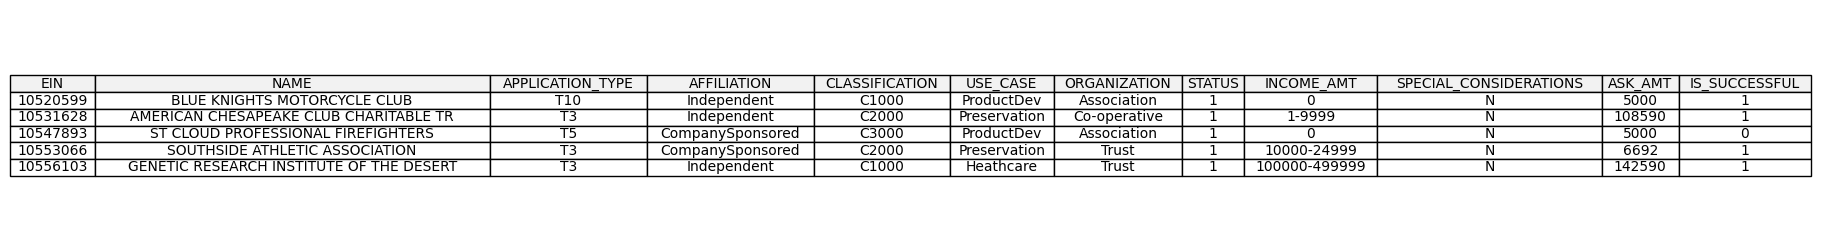

### Spliting the preprocessed data into training and testing dataset

- Training data (features): 27,439 samples
- Testing data (features): 6,860 samples
- Training data (target): 27,439 samples
- Testing data (target): 6,860 samples

In [32]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(len(X_train), len(X_test), len(y_train), len(y_test))

(27439, 6860, 27439, 6860)

In [33]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

To define a deep neural network, we'll use TensorFlow and its high-level Keras API. Here is a proposed structure for the neural network:

- Input Layer: The number of nodes will be equal to the number of features in our dataset, which is 43.
- Hidden Layer 1: We'll start with 80 nodes in the first hidden layer and use the 'relu' activation function.
- Hidden Layer 2: We'll have 30 nodes in the second hidden layer and also use the 'relu' activation function.
- Output Layer: Since this is a binary classification problem, we'll have 1 node in the output layer with a 'sigmoid' activation function to output values between 0 and 1.

In [42]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

In [43]:
nn = tf.keras.models.Sequential()

In [44]:
# First hidden layer
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

In [45]:
# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation='relu'))

In [46]:
# Output layer
nn.add(Dense(units=1, activation='sigmoid'))

In [48]:
# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                3520      
                                                                 
 dense_4 (Dense)             (None, 30)                2430      
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5981 (23.36 KB)
Trainable params: 5981 (23.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compile the model

To compile the model, we need to specify the optimizer, loss function, and metrics. For a binary classification problem like this one, we can use the following settings:

- Optimizer: 'adam' — a popular choice for training deep neural networks as it automatically adjusts the learning rate during training.
- Loss function: 'binary_crossentropy' — a common choice for binary classification problems.
- Metrics: 'accuracy' — to track the accuracy of the training process.

In [49]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Train the model

In [50]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
858/858 [==============================] - 1s 831us/step - loss: 0.5673 - accuracy: 0.7209
Epoch 2/100
858/858 [==============================] - 1s 826us/step - loss: 0.5535 - accuracy: 0.7302
Epoch 3/100
858/858 [==============================] - 1s 811us/step - loss: 0.5511 - accuracy: 0.7313
Epoch 4/100
858/858 [==============================] - 1s 822us/step - loss: 0.5501 - accuracy: 0.7310
Epoch 5/100
858/858 [==============================] - 1s 811us/step - loss: 0.5487 - accuracy: 0.7328
Epoch 6/100
858/858 [==============================] - 1s 846us/step - loss: 0.5478 - accuracy: 0.7318
Epoch 7/100
858/858 [==============================] - 1s 904us/step - loss: 0.5467 - accuracy: 0.7320
Epoch 8/100
858/858 [==============================] - 1s 835us/step - loss: 0.5464 - accuracy: 0.7341
Epoch 9/100
858/858 [==============================] - 1s 918us/step - loss: 0.5454 - accuracy: 0.7336
Epoch 10/100
858/858 [==============================] - 1s 828us/step - l

### Evaluate the model using the test data

In [51]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 0s - loss: 0.5663 - accuracy: 0.7259 - 281ms/epoch - 1ms/step
Loss: 0.5662582516670227, Accuracy: 0.7259474992752075


### Export our model to HDF5 file

In [52]:
# Export our model to HDF5 file
nn.save("trained_model.h5")

C:\Development\columbia-university\venv\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Report on the Neural Network Model

### 1.	A snippet of the initial dataset showcasing the variables mentioned.

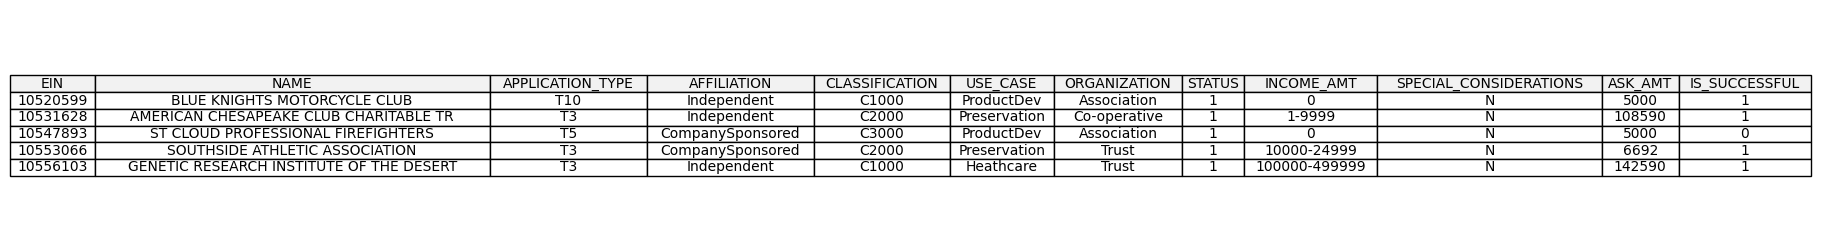

In [6]:
import matplotlib.pyplot as plt

# Displaying the first few rows of the dataset as a snippet
snippet_df = application_df.head()

# Plotting a table with the snippet data and removing axis
fig, ax = plt.subplots(figsize=(14, 3)) 
ax.axis('tight')
ax.axis('off')
tbl = ax.table(cellText=snippet_df.values, colLabels=application_df.columns, loc='center', cellLoc ='center', colColours=['#f2f2f2']*application_df.shape[1])

# Auto adjust column widths to make the table more spacious
tbl.auto_set_column_width(col=list(range(len(application_df.columns))))
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
plt.show()

In [7]:
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


### 2.	Bar charts or pie charts representing the distribution of the target variable (`IS_SUCCESSFUL`), which would give an idea of the balance between successful and unsuccessful applicants in the dataset.

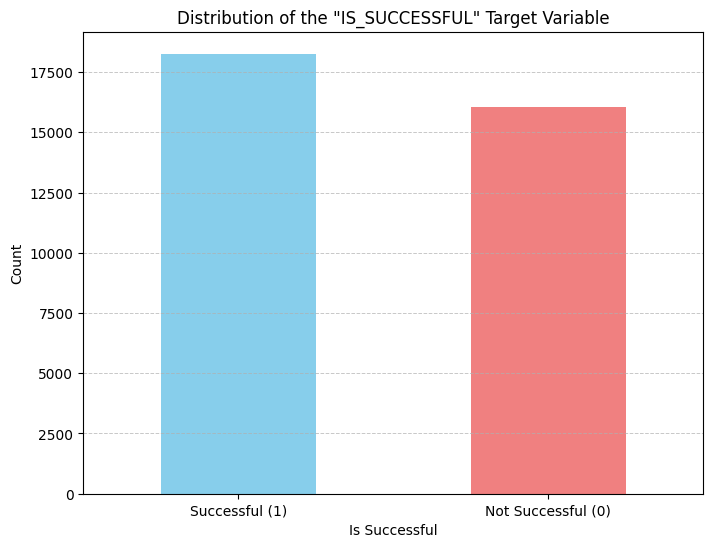

In [12]:
# Getting the distribution of the target variable 'IS_SUCCESSFUL'
target_distribution = application_df['IS_SUCCESSFUL'].value_counts()

# Plotting the distribution as a bar chart
plt.figure(figsize=(8, 6))

# Bar chart
target_distribution.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribution of the "IS_SUCCESSFUL" Target Variable')
plt.xlabel('Is Successful')
plt.ylabel('Count')
plt.xticks([0, 1], ['Successful (1)', 'Not Successful (0)'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.7)
plt.show()

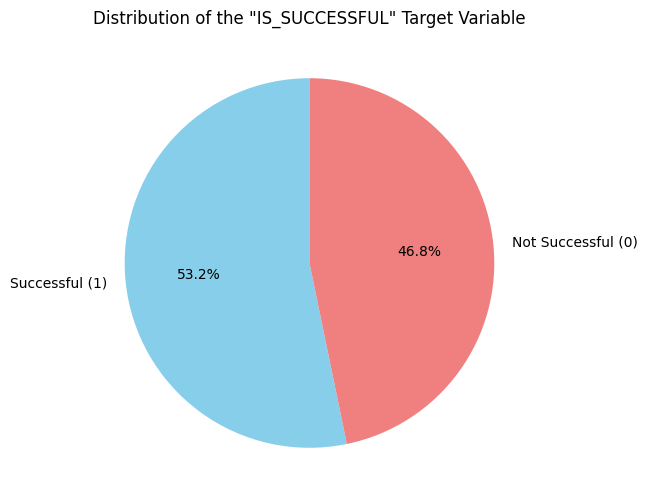

In [13]:
# Plotting the distribution as a pie chart
plt.figure(figsize=(6, 6))

# Pie chart
target_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'], labels=['Successful (1)', 'Not Successful (0)'])
plt.title('Distribution of the "IS_SUCCESSFUL" Target Variable')
plt.ylabel('')
plt.show()

### 3.	A correlation matrix or heatmap to show the relationships between different variables, helping to identify the most important features for the model (though this was not explicitly performed in the analysis you conducted).

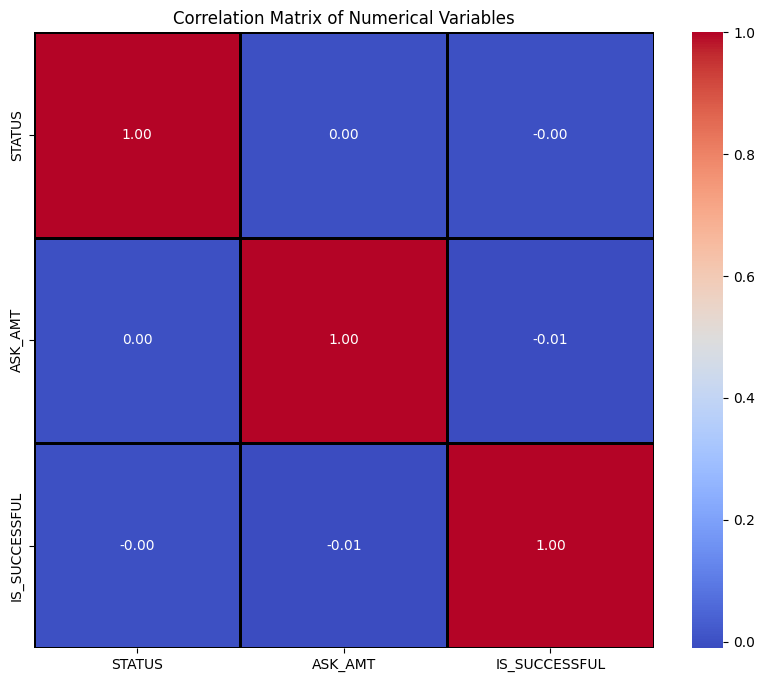

In [19]:
# Creating a correlation matrix using only the numerical columns
numerical_charity_data_df = application_df.select_dtypes(include=['int64', 'float64'])

# Calculating the correlation matrix
numerical_correlation_matrix = numerical_charity_data_df.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1, linecolor='black')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()